<h1>
           Data Exploration
</h1>

<p>

</p>

In [90]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
%matplotlib inline
#import all necessary libraries

train = pd.read_csv('train.csv')
print train 

print train.columns

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

<p>
    From the last output we see the different categories we could compare and choose to compare for our model.
    Next we will define a method that will compare the percentages of two groups that automatically creates a 
    automated statement and a histogram of each group
</p>

In [91]:
male = train[train['Sex'] == 'male']
female = train[train['Sex'] == 'female']
class_1 = train[train['Pclass'] == 1]
class_2 = train[train['Pclass'] == 2]
class_3 = train[train['Pclass'] == 3]


def calc_survival_percent(group1, group2,name1,name2):
    import thinkplot
    #creates a histogram of each group and comparative statement comparing two groups
    #group 1 represents the first input and group 2 represents the second input
    tot_1 = len(group1[group1['Survived'] == 1].Survived) / float(len(group1.Survived))
    tot_2 = len(group2[group2['Survived'] == 1].Survived) / float(len(group2.Survived))
    
    hist = thinkstats2.Hist(group1.Survived)
    thinkplot.Hist(hist,label = name1 + "Survival Rate")
    thinkplot.Show()
    hist2 = thinkstats2.Hist(group2.Survived,label = name2 + "Survival Rate")
    thinkplot.Hist(hist2,label = name2 + "Survival Rate")
    thinkplot.Show()
    
    if tot_1 > tot_2:
        print name1 + ': ' + str(tot_1) + ' has a higher survival rate(%) than ' + name2 + ': ' + str(tot_2)
    elif tot_2 > tot_1:
        print name2 + ': ' + str(tot_2) + ' has a higher survival rate(%) than ' + name1 + ': ' + str(tot_1)
    else:
        print name1 + ': ' + str(tot_1) + ' has the same survival rate(%) as ' + name2 + ': ' + str(tot_2)

        


<p>
Next we will compare a few categories against each other for survival rate
</p>

Male vs Females


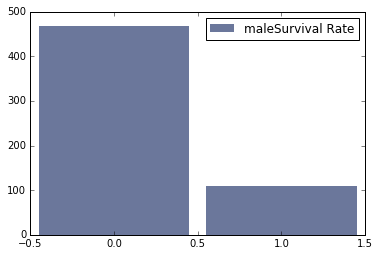

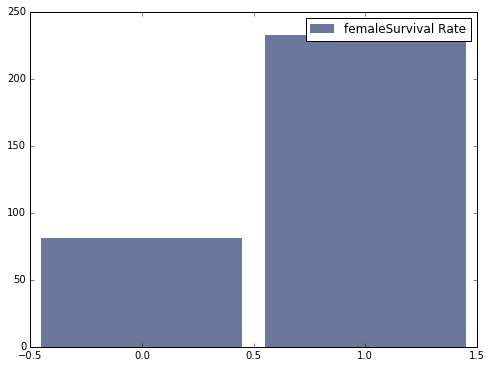

female: 0.742038216561 has a higher survival rate(%) than male: 0.188908145581
1st class vs 2nd class


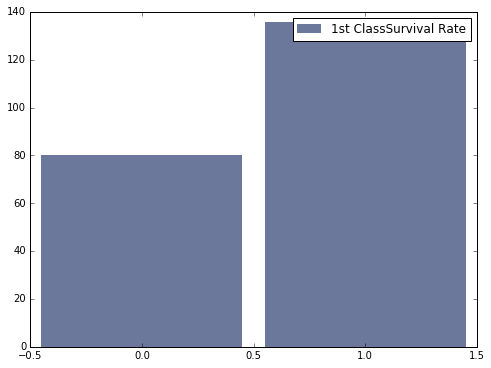

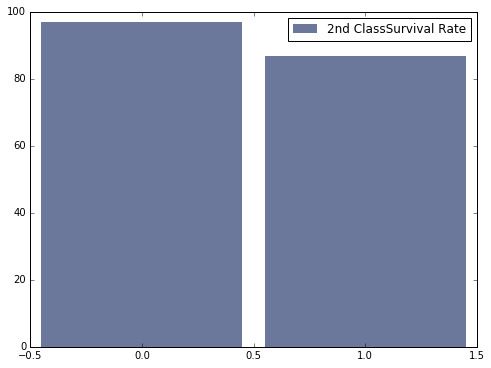

1st Class: 0.62962962963 has a higher survival rate(%) than 2nd Class: 0.472826086957
1st class vs 3rd class


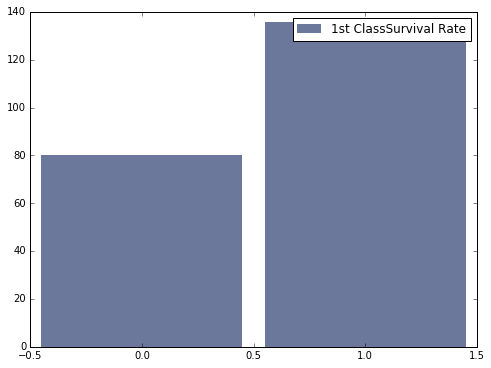

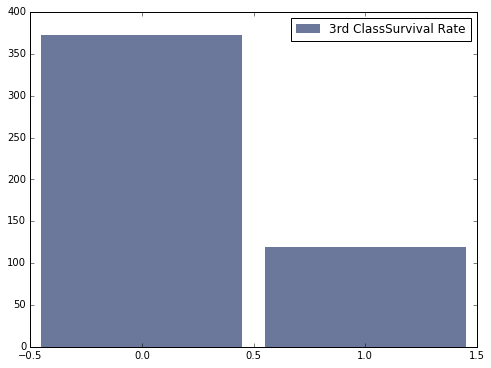

1st Class: 0.62962962963 has a higher survival rate(%) than 3rd Class: 0.242362525458
2nd class vs 3rd class


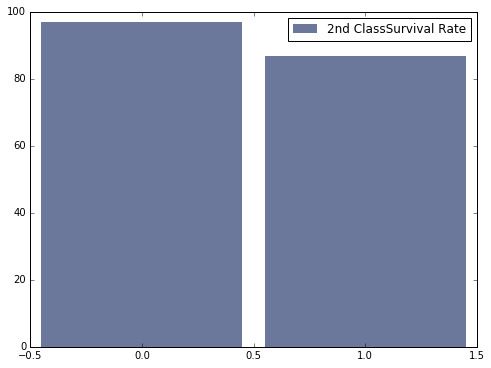

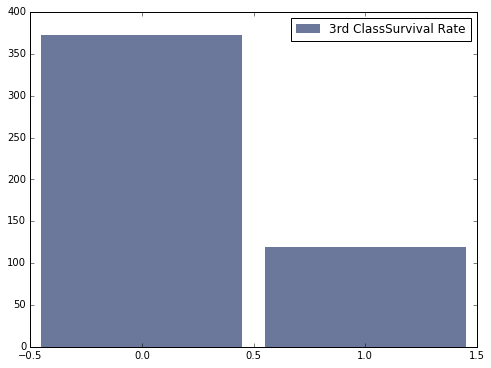

2nd Class: 0.472826086957 has a higher survival rate(%) than 3rd Class: 0.242362525458


In [92]:
print 'Male vs Females'
calc_survival_percent(male,female,"male","female")
print '1st class vs 2nd class'
calc_survival_percent(class_1,class_2,"1st Class","2nd Class")
print '1st class vs 3rd class'
calc_survival_percent(class_1,class_3,"1st Class","3rd Class")
print '2nd class vs 3rd class'
calc_survival_percent(class_2,class_3,"2nd Class","3rd Class")

<p>
    From the previous comparisons females are favored vs males. In order of favorability: 1st class > 2nd class > 3rd class
    To investigate relationships of conjunction of features we will explore a few cases:
</p>

Adult Males vs Young Males


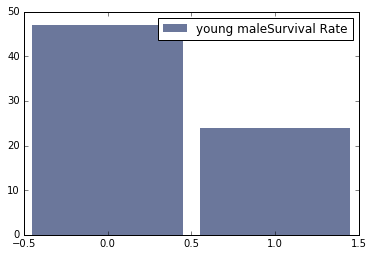

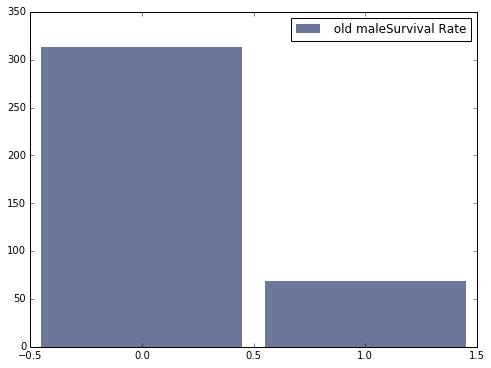

young male: 0.338028169014 has a higher survival rate(%) than  old male: 0.180628272251
Males w/families vs Females w/families


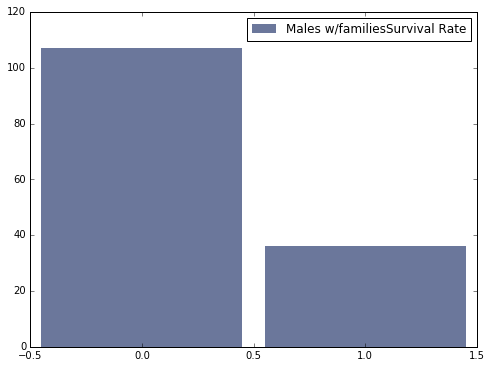

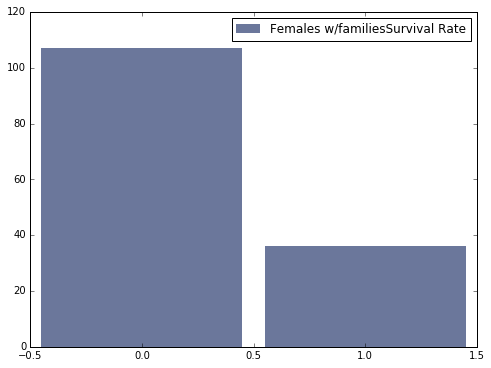

Males w/families: 0.251748251748 has the same survival rate(%) as Females w/families: 0.251748251748


In [93]:
young_male = male[male['Age'] <= 18]
old_male = male[male['Age'] > 18]
male_fam = male[male['SibSp'] > 0]
female_fam = male[male['SibSp'] > 0]

print 'Adult Males vs Young Males'
calc_survival_percent(young_male, old_male,"young male"," old male")
print 'Males w/families vs Females w/families'
calc_survival_percent(male_fam,female_fam,"Males w/families","Females w/families")

<p>
If we were to interpret the results from our two comparisons Age seems to be a significant factor for survivability. The family result is to be expected b/c families is defined by at least 1 immediate family on board and in that time frame there should be an equal amount of males and females (from being spouses). 
</p>

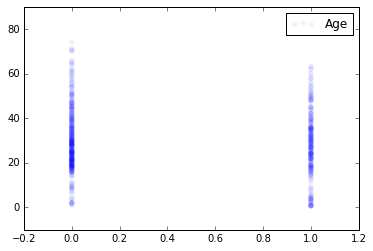

In [94]:
survivors = train.Survived
age = train.Age
thinkplot.Scatter(survivors,age,alpha=0.05)
thinkplot.Show()

<p>
    From the visualization we see that the distribution of survivors is slightly younger and smaller for survivors.
</p>